In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install SimpleITK==2.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 17.4 MB/s eta 0:00:00


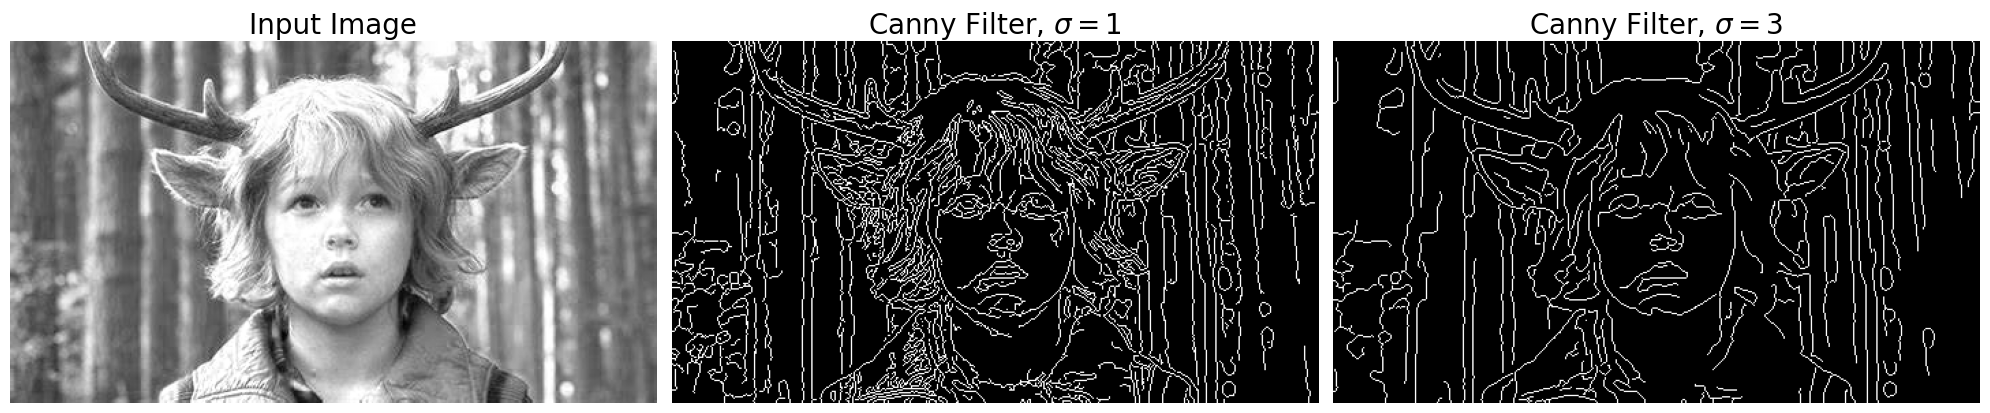

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

image = sitk.ReadImage('/content/drive/MyDrive/images/sweet.jpeg')

if image.GetNumberOfComponentsPerPixel() > 1:
    image = sitk.VectorIndexSelectionCast(image, 0)

image = sitk.Cast(image, sitk.sitkUInt8)
image = sitk.Cast(image, sitk.sitkFloat32)

edges1 = sitk.CannyEdgeDetection(image, lowerThreshold=5, upperThreshold=10, variance=[1, 1])
edges2 = sitk.CannyEdgeDetection(image, lowerThreshold=5, upperThreshold=10, variance=[3, 3])

image = sitk.GetArrayFromImage(image)
edges1 = sitk.GetArrayFromImage(edges1)
edges2 = sitk.GetArrayFromImage(edges2)

fig = plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Input Image", fontsize=20)

plt.subplot(132)
plt.imshow(edges1, cmap="gray")
plt.axis("off")
plt.title(r"Canny Filter, $\sigma=1$", fontsize=20)

plt.subplot(133)
plt.imshow(edges2, cmap="gray")
plt.axis("off")
plt.title(r"Canny Filter, $\sigma=3$", fontsize=20)

fig.tight_layout()
plt.show()